# 빅데이터 물리학 과제3

3주차 (9월 25일): random number, average, stddev sample mean, MC integration (basic) jupyter notebook

과제: 3차원 구의 charge density가 kr 로 주어졌을 때 임의의 위치에서 electric field 계산하기 (sample point수에 따른 MC 오차와 함께)

Additional exercise: 임의의 charge density일때는? +,- 반구 두 개가 붙어 있을때는?

In [10]:
from tqdm import tqdm_notebook, tnrange
import random
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [11]:
def get_random_point_in_sphrical_coordinate(sample_point_num, sample_point_range):
    
    r_list = np.array([])
    theta_list = np.array([])
    pi_list = np.array([])
    
    for i in tqdm_notebook(range(sample_point_num),desc = 'getting random point...'):
        r_list = np.append(r_list, random.random()*sample_point_range)
        theta_list = np.append(theta_list, random.random()*pi)
        pi_list = np.append(pi_list, random.random()*2*pi)
        
    return r_list, theta_list, pi_list

def calc_electric_field(r_list, theta_list, pi_list, k_r, sphere_radius, sample_point_num):
    sphere_V = (4/3)*pi*((sphere_radius)**3)
    sphere_q = k_r * sphere_V
    epsilon_0 = 1 # 편의상 1로 설정
    
    for i in tqdm_notebook(range(sample_point_num),desc = 'calculating...'):
        if sphere_radius > r_list[i]: # R > r
            E_r_list = (1 / (4 * pi * epsilon_0 * (r_list[i]) ** 2)) * sphere_q
        else: # R < r
            E_r_list = (sphere_q / 4 * pi * epsilon_0) * (r_list[i] / ((sphere_radius)**3))
            
    E_theta_list = theta_list
    E_pi_list = pi_list
    
    return E_r_list, E_theta_list, E_pi_list


In [12]:
sample_point_num = int(input(prompt="sample_point 개수를 입력하세요 : "))
sample_point_range = int(input(prompt="sample_point의 원점으로부터의 최대 거리를 입력하세요 : "))

r_list, theta_list ,pi_list = get_random_point_in_sphrical_coordinate(sample_point_num, sample_point_range)
xlist = r_list * np.sin(theta_list) * np.cos(pi_list)
ylist = r_list * np.sin(theta_list) * np.sin(pi_list)
zlist = r_list * np.cos(theta_list)

k_r = float(input(prompt="구의 charge density를 입력하세요 : "))
sphere_radius = float(input(prompt="구의 반지름을 입력하세요 : "))

E_r_list, E_theta_list ,E_pi_list = calc_electric_field(r_list, theta_list, pi_list, k_r, sphere_radius, sample_point_num)
E_xlist = E_r_list * np.sin(E_theta_list) * np.cos(E_pi_list)
E_ylist = E_r_list * np.sin(E_theta_list) * np.sin(E_pi_list)
E_zlist = E_r_list * np.cos(E_theta_list)

sample_point 개수를 입력하세요 : 1000
sample_point의 원점으로부터의 최대 거리를 입력하세요 : 10


<ipython-input-11-b3f9c5e1cb04>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(sample_point_num),desc = 'getting random point...'):



구의 charge density를 입력하세요 : 1
구의 반지름을 입력하세요 : 5


<ipython-input-11-b3f9c5e1cb04>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(sample_point_num),desc = 'calculating...'):


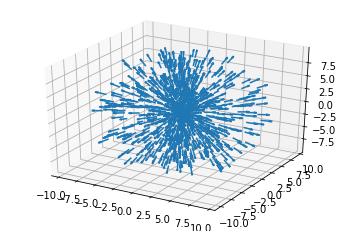

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(xlist,ylist,zlist,E_xlist,E_ylist,E_zlist,length = 0.05)